# Lab: Week #17 | Analyzing Search Algorithms
---

### **Description**:  
In this week's lab, we will learn about two of the most famous classical search algorithms: linear and binary search. We will implement and analyze their performance.

---

## **Part 0: Importing from Qiskit**
---

Run the cell directly below before doing anything else. This will import all of the functions that we will use today.

In [1]:
!pip install qiskit

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import *


# Importing other python libraries
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


## **Part 1: Linear Search**
---

In this section, we will implement and analyze the linear search algorithm.

### **Exercise #1** 

**Together**, let's copmlete the code below to implement linear search for a list of numbers. We will use the following variables:
* `list_items`: A list of numbers from 0 to 49 that we will search through.
* `marked_item`: A randomly selected number from the list that we will search for.
* `number_queries`: A count of how many times we need to query the list to find the marked item.

In [2]:
list_items = range(50)
marked_item = random.choice(list_items)

number_queries = 0
for item in list_items:

    number_queries = number_queries + 1 # COMPLETE THIS LINE
    
    if item == marked_item:# COMPLETE THIS LINE
        print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
        break

1 has been found in 2 queries.


### **Exercise #2** 

**Together**, let's complete the code below to run our linear search many times to find the *worst number of queries*. We will use the following additional variables:
* `number_trials`: The number of times to repeat the linear search.
* `worst_query`: The most number of queries we had to make across all trials.

In [13]:
number_trials = 50
worst_query = 0
list_items = range(50)

for i in range(number_trials):
    marked_item = random.choice(list_items)
    number_queries = 0
    for item in list_items:

        number_queries = number_queries + 1 # COMPLETE THIS LINE
    
        if item == marked_item:# COMPLETE THIS LINE
            print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
            break 

    worst_query = max(worst_query, number_queries)

print("Worst number of queries: " + str(worst_query))

37 has been found in 38 queries.
0 has been found in 1 queries.
40 has been found in 41 queries.
49 has been found in 50 queries.
28 has been found in 29 queries.
48 has been found in 49 queries.
34 has been found in 35 queries.
7 has been found in 8 queries.
41 has been found in 42 queries.
38 has been found in 39 queries.
5 has been found in 6 queries.
33 has been found in 34 queries.
49 has been found in 50 queries.
1 has been found in 2 queries.
23 has been found in 24 queries.
9 has been found in 10 queries.
33 has been found in 34 queries.
7 has been found in 8 queries.
20 has been found in 21 queries.
45 has been found in 46 queries.
46 has been found in 47 queries.
9 has been found in 10 queries.
47 has been found in 48 queries.
31 has been found in 32 queries.
30 has been found in 31 queries.
34 has been found in 35 queries.
36 has been found in 37 queries.
30 has been found in 31 queries.
0 has been found in 1 queries.
17 has been found in 18 queries.
20 has been found in 21 

### **Exercise #3** 

**Together**, let's put this code into a function called `linear_search` such that it:
* Takes `n` as input parameters.
* Runs the code we wrote in Exercise #2 such that there are `n` items in `list_items`.
* Returns the worst number of queries instead of printing it.

In [16]:
def linear_search(n):
    
    number_trials = 100
    worst_query = 0
    list_items = range(n)

    for i in range(number_trials):
        marked_item = random.choice(list_items)

        number_queries = 0
        for item in list_items:

            number_queries = number_queries + 1 # COMPLETE THIS LINE

            if item == marked_item:# COMPLETE THIS LINE
                print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
                break 

        worst_query = max(worst_query, number_queries)


    return worst_query

### **Exercise #4** 

**Together**, let's graph the worst number of queries for list sizes from 100 to 10000.

51 has been found in 52 queries.
45 has been found in 46 queries.
73 has been found in 74 queries.
0 has been found in 1 queries.
72 has been found in 73 queries.
36 has been found in 37 queries.
5 has been found in 6 queries.
13 has been found in 14 queries.
98 has been found in 99 queries.
29 has been found in 30 queries.
78 has been found in 79 queries.
0 has been found in 1 queries.
27 has been found in 28 queries.
95 has been found in 96 queries.
63 has been found in 64 queries.
48 has been found in 49 queries.
88 has been found in 89 queries.
3 has been found in 4 queries.
98 has been found in 99 queries.
7 has been found in 8 queries.
88 has been found in 89 queries.
32 has been found in 33 queries.
52 has been found in 53 queries.
60 has been found in 61 queries.
83 has been found in 84 queries.
94 has been found in 95 queries.
24 has been found in 25 queries.
85 has been found in 86 queries.
51 has been found in 52 queries.
80 has been found in 81 queries.
30 has been found in

[]

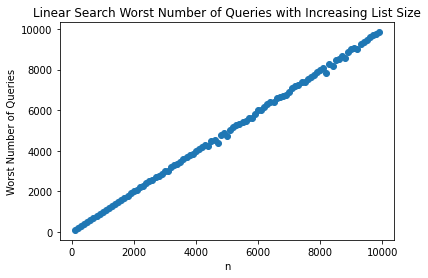

In [17]:
linear_queries = []
ns = range(100, 10000, 100)
for n in ns:
  linear_queries += [linear_search(n)]

plt.scatter(ns, linear_queries, label = "linear")
plt.xlabel("n")
plt.ylabel("Worst Number of Queries")
plt.title("Linear Search Worst Number of Queries with Increasing List Size")

plt.plot()

## **Part 2: Binary Search**
---

In this section, we will implement and analyze the binary search algorithm. We will also visually compare it to the linear search algorithm we implemented above.

### **Exercise #1** 

**Together**, let's copmlete the code below to implement binary search for a list of numbers. We will use the following variables:
* `list_items`: A list of numbers from 0 to 49 that we will search through.
* `marked_item`: A randomly selected number from the list that we will search for.
* `number_queries`: A count of how many times we need to query the list to find the marked item.

In [19]:
list_items = range(50)
marked_item = random.choice(list_items)

left = 0
right = len(list_items) - 1

number_queries = 0
for item in list_items:
  
  number_queries = number_queries + 1

  middle = int((left + right)/2)
  if list_items[middle] > marked_item:
    right = middle
  elif list_items[middle] < marked_item:
    left = middle
  else:
    print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
    break

14 has been found in 6 queries.


### **Exercise #2** 

**Independently**, complete the code below to run our binary search many times to find the *worst number of queries*. You will use the following additional variables:
* `number_trials`: The number of times to repeat the binary search.
* `worst_query`: The most number of queries we had to make across all trials.

In [28]:
number_trials = 10
worst_query = 0
list_items = range(50)

for i in range(number_trials):

    marked_item = random.choice(list_items)

    left = 0
    right = len(list_items) - 1

    number_queries = 0
    for item in list_items:

        number_queries = number_queries + 1

        middle = int((left + right)/2)
        if list_items[middle] > marked_item:
            right = middle
        elif list_items[middle] < marked_item:
            left = middle
        else:
            print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
            break  

    worst_query = max(worst_query, number_queries)

print("Worst number of queries: " + str(worst_query))

26 has been found in 6 queries.
45 has been found in 4 queries.
20 has been found in 6 queries.
28 has been found in 5 queries.
40 has been found in 5 queries.
9 has been found in 4 queries.
16 has been found in 5 queries.
17 has been found in 6 queries.
32 has been found in 6 queries.
3 has been found in 4 queries.
Worst number of queries: 6


### **Exercise #3** 

**Independently**, put this code into a function called `binary_search` such that it:
* Takes `n` as input parameters.
* Runs the code we wrote in Exercise #2 such that there are `n` items in `list_items`.
* Returns the worst number of queries instead of printing it.

In [31]:
def binary_search(n):

    number_trials = 10
    worst_query = 0
    list_items = range(n)

    for i in range(number_trials):

        marked_item = random.choice(list_items)

        left = 0
        right = len(list_items) - 1

        number_queries = 0
        for item in list_items:

            number_queries = number_queries + 1

            middle = int((left + right)/2)
            if list_items[middle] > marked_item:
                right = middle
            elif list_items[middle] < marked_item:
                left = middle
            else:
                print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
                break  

        worst_query = max(worst_query, number_queries)

    #print("Worst number of queries: " + str(worst_query))  

    return worst_query

### **Exercise #4** 

**Independently**, graph the worst number of queries for list sizes from 100 to 10000.

21 has been found in 5 queries.
58 has been found in 5 queries.
12 has been found in 3 queries.
28 has been found in 6 queries.
66 has been found in 7 queries.
6 has been found in 4 queries.
63 has been found in 7 queries.
47 has been found in 6 queries.
63 has been found in 7 queries.
65 has been found in 6 queries.
44 has been found in 8 queries.
194 has been found in 8 queries.
47 has been found in 7 queries.
167 has been found in 5 queries.
157 has been found in 8 queries.
146 has been found in 8 queries.
145 has been found in 6 queries.
24 has been found in 3 queries.
142 has been found in 5 queries.
156 has been found in 7 queries.
284 has been found in 6 queries.
11 has been found in 7 queries.
140 has been found in 8 queries.
17 has been found in 9 queries.
26 has been found in 9 queries.
89 has been found in 7 queries.
88 has been found in 8 queries.
128 has been found in 8 queries.
254 has been found in 8 queries.
254 has been found in 8 queries.
350 has been found in 8 queri

[]

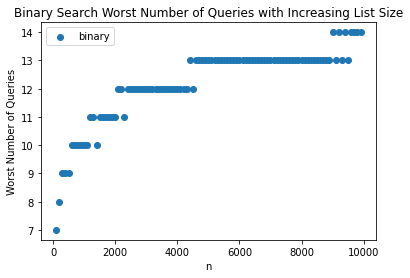

In [36]:
binary_queries = []
ns = range(100, 10000, 100)
for n in ns:
    binary_queries += [binary_search(n)]

plt.scatter(ns, binary_queries, label = "binary")

plt.xlabel("n")
plt.ylabel("Worst Number of Queries")
plt.title("Binary Search Worst Number of Queries with Increasing List Size")
plt.legend()

plt.plot()

### **Exercise #5** 

**Together**, let's graph the worst number of queries for list sizes from 100 to 10000 *for both linear and binary search*.

32 has been found in 33 queries.
84 has been found in 85 queries.
92 has been found in 93 queries.
75 has been found in 76 queries.
40 has been found in 41 queries.
55 has been found in 56 queries.
12 has been found in 13 queries.
45 has been found in 46 queries.
94 has been found in 95 queries.
68 has been found in 69 queries.
25 has been found in 26 queries.
14 has been found in 15 queries.
49 has been found in 50 queries.
30 has been found in 31 queries.
48 has been found in 49 queries.
11 has been found in 12 queries.
38 has been found in 39 queries.
50 has been found in 51 queries.
23 has been found in 24 queries.
59 has been found in 60 queries.
91 has been found in 92 queries.
19 has been found in 20 queries.
13 has been found in 14 queries.
47 has been found in 48 queries.
71 has been found in 72 queries.
48 has been found in 49 queries.
30 has been found in 31 queries.
18 has been found in 19 queries.
28 has been found in 29 queries.
54 has been found in 55 queries.
10 has bee

[]

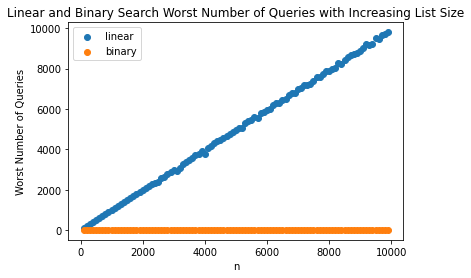

In [35]:
linear_queries = []
binary_queries = []
ns = range(100, 10000, 100)
for n in ns:
    linear_queries += [linear_search(n)]
    binary_queries += [binary_search(n)]


plt.scatter(ns, linear_queries, label = "linear")
plt.scatter(ns, binary_queries, label = "binary")

plt.xlabel("n")
plt.ylabel("Worst Number of Queries")
plt.title("Linear and Binary Search Worst Number of Queries with Increasing List Size")
plt.legend()

plt.plot()

### **Exercise #6** 

**Together**, let's see how the performance of binary and linear search change when the order of items in the list is random using the `random.sample(...)` function. We will do this in 3 steps:

1. Rewrite the `linear_search` function so that the list is randomly ordered.
2. Rewrite the `binary_search` function so that the list is randomly ordered.
3. Graph the average number of queries for both search algorithms.

---

#### **1. Rewrite the `linear_search` function so that the list is randomly ordered.**

In [ ]:
def linear_search(n):

  number_trials = 10
  worst_query = 0
  list_items = # COMPLETE THIS LINE

  for i in range(number_trials):

    marked_item = random.choice(list_items)
    number_queries = 0
    for item in list_items:

      number_queries = number_queries + 1

      if item == marked_item:
        #print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
        break
    
    worst_query = max(worst_query, number_queries)

  return worst_query

#### **2. Rewrite the `binary_search` function so that the list is randomly ordered.**

In [ ]:
def binary_search(n):

  number_trials = 10
  worst_query = 0
  list_items = # COMPLETE THIS LINE

  for i in range(number_trials):

    marked_item = random.choice(list_items)

    left = 0
    right = len(list_items) - 1

    number_queries = 0
    for item in list_items:
      
      number_queries = number_queries + 1

      middle = int((left + right)/2)
      if list_items[middle] > marked_item:
        right = middle
      elif list_items[middle] < marked_item:
        left = middle
      else:
        #print(str(marked_item) + " has been found in " + str(number_queries) + " queries.")
        break
    
    worst_query = max(worst_query, number_queries)

  return worst_query

#### **3. Graph the average number of queries for both search algorithms.**

#End of Lab
---
© 2023 The Coding School, All rights reserved